In [50]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import os
import re
from random import sample
from PIL import Image
import json
import csv


os.getcwd()

'/usr/users/vogg/FairMOT/own_ideas'

## Crowdhuman Bounding Boxes

In [51]:
path1 = "/local_datasets/crowdhuman/labels_with_ids/train/"
path2 = "/local_datasets/crowdhuman/images/train/"

### One example

### Function

In [55]:
def plotBBox(img_id, img_path, label_path, ending = ".jpg"):
    coords = pd.read_csv(label_path + img_id + ".txt", header = None, 
                       sep = " ")
    im = cv2.imread(img_path + img_id + ending)
    
    im_h, im_w = im.shape[:2]
    print(im_w)
    for i in range(len(coords)):
        center = tuple(map(int, (im_w * coords.iloc[i, 2], im_h * coords.iloc[i, 3])))
        low_left = tuple(map(int, (im_w * (coords.iloc[i, 2] - coords.iloc[i, 4]/2),
                                   im_h * (coords.iloc[i, 3] - coords.iloc[i, 5]/2))))
        up_right = tuple(map(int, (im_w * (coords.iloc[i, 2] + coords.iloc[i, 4]/2), 
                                 im_h * (coords.iloc[i, 3] + coords.iloc[i, 5]/2))))

        color = (i * 100 % 255, i * 75 % 255, i * 50 % 255)
        im = cv2.circle(im, center, radius = 2, color = color, thickness = 5)
        im = cv2.rectangle(im, low_left, up_right, color = color, thickness = 5)
        
    fig, ax = plt.subplots(figsize=(10, 7))
    ax.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
    
    plt.show()

380


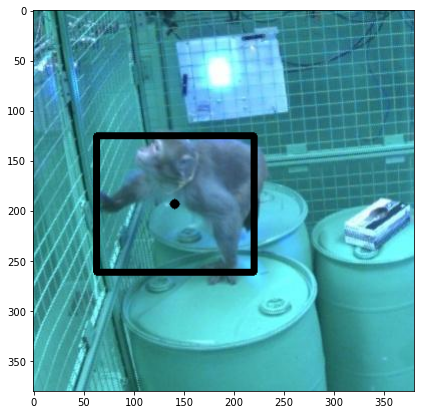

In [69]:
plotBBox('batch7_000023860_18261013', '/local_datasets/OpenMonkeyStudio/images/', 
         '/local_datasets/OpenMonkeyStudio/labels_with_ids/')

2560


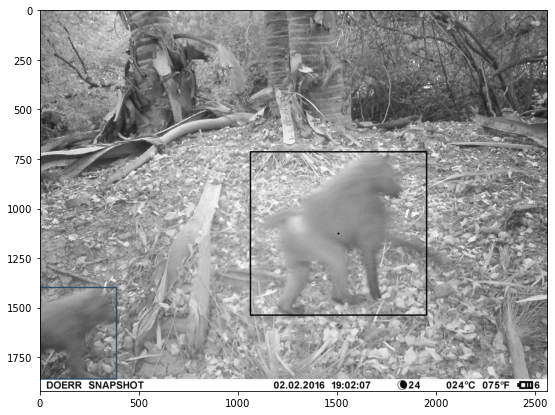

In [63]:

plotBBox('IMAG0034%20-%202015%20-%20jan%20-%20ct3', 
         '/usr/users/vogg/Labelling/Baboons/images/',
        '/usr/users/vogg/Labelling/Baboons/labels_with_ids/',
        '.JPG')


In [ ]:
plotBBox()

## Show trajectories

In [33]:
img_path = "/usr/users/vogg/test/labels_with_ids/"
labels = pd.read_csv(img_path + "../Validation-export.csv")
img_list = labels['image'].unique()

In [65]:
img_id0 = img_list[0]
im = cv2.imread(img_path + "../images/" +img_id0)
im_h, im_w = im.shape[:2]


print(im.shape)

(1080, 1920, 3)


In [77]:
for img_id in img_list:
    img_id = re.sub("[.]jpg","", img_id)
    coords = pd.read_csv(img_path + img_id + ".txt", header = None, 
                           sep = " ")
    
    for index, row in coords.iterrows():
        center = tuple(map(int, (im_w * row[2], im_h * row[3])))
        low_left = tuple(map(int, (im_w * (row[2] - row[4]/2),
                                   im_h * (row[3] - row[5]/2))))
        up_right = tuple(map(int, (im_w * (row[2] + row[4]/2), 
                                 im_h * (row[3] + row[5]/2))))

        color = (row[1] * 170 % 255, row[1] * 100 % 255, row[1] * 70 % 255)
        im = cv2.circle(im, center, radius = 3, color = color, thickness = 5)

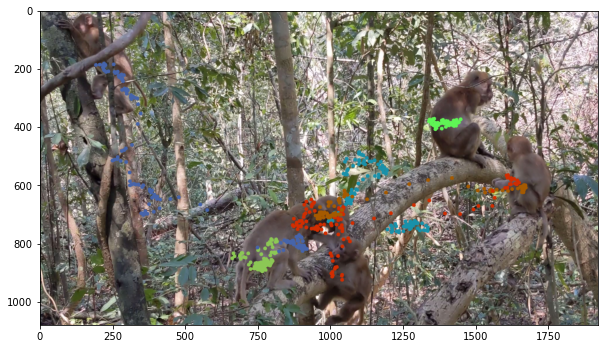

In [78]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))

## Interactive sliders

In [9]:
path1 = "/usr/users/agecker/datasets/macaque_videos/VID_20210223_123630_0/labels_with_ids/"
path2 = "/usr/users/agecker/datasets/macaque_videos/VID_20210223_123630_0/images/"

In [17]:
frames = sorted(os.listdir(path2))
frames = [re.sub("[.]jpg", "", item) for item in frames]
frames = frames[1:]

In [36]:
## Interactive
import ipywidgets as widgets
from IPython.display import display, clear_output

frame_slider = widgets.IntSlider(description = "Frame", min = 0, max = 100)
output = widgets.Output()

def slider_change(ch):
    with output:
        clear_output()
        plotBBox(frames[0][:-6]+str(frame_slider.value).zfill(6),path2,path1)
        print (frames[0][:-6]+str(frame_slider.value).zfill(6))
        
frame_slider.observe(slider_change, names = "value")
    
display(frame_slider, output)

IntSlider(value=0, description='Frame')

Output()